In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.shape

(59537, 246)

Exclusions

In [4]:
other_etiology = (lsl_dr[['etiology_3___2', 'etiology_3___4', 'etiology_3___5', 'etiology_3___6', 'etiology_3___9',
       'etiology_oth___1', 'etiology_oth___3', 'etiology_oth___4', 'etiology_oth___8', 'etiology_oth___9']]
                      .sum(1).astype(bool))

In [5]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & (lsl_dr.hl==0)
                  & ((lsl_dr.autism==1)))

In [6]:
autism_subset = lsl_dr[inclusion_mask]
autism_subset.drop_duplicates(subset='study_id').shape

(33, 246)

## Demographics

In [7]:
autism_subset.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      107
Female     36
Name: male, dtype: int64

In [8]:
autism_subset.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       84
Other       33
Black       14
Asian        8
Hispanic     4
Name: race, dtype: int64

In [9]:
(autism_subset.premature_age.replace({9:None})==8).replace({True: '>=36 weeks', False: '<36 weeks', 
                                                            np.nan: 'Unknown'}).value_counts()

>=36 weeks    106
<36 weeks      37
Name: premature_age, dtype: int64

In [10]:
autism_subset.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1          41
2          58
3          19
4+          6
Missing    19
Name: sib, dtype: int64

In [11]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

autism_subset.mother_ed.replace(ed_lookup).value_counts()

High school diploma/GED    58
Unknown                    41
Some college               30
Some high school           14
Name: mother_ed, dtype: int64

In [12]:
autism_subset.father_ed.replace(ed_lookup).value_counts()

Unknown                    50
Bachelor's degree          43
Post graduate degree       31
Some college               11
High school diploma/GED     8
Name: father_ed, dtype: int64

In [13]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

autism_subset.family_inv.replace(family_lookup).value_counts()

Average Participation    49
Ideal Participation      49
Missing                  20
Good Participation       17
Below Average             8
Name: family_inv, dtype: int64

In [14]:
autism_subset[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,132.000000,127.000000,110.000000,143.000000
mean,16.159091,20.141732,20.018182,32.713287
std,18.793303,19.239396,19.012300,21.304837
min,0.000000,1.000000,1.000000,1.000000
25%,1.750000,3.000000,3.000000,19.000000
50%,10.000000,19.000000,19.500000,33.000000
75%,21.500000,28.000000,26.000000,48.000000
max,83.000000,83.000000,83.000000,83.000000


In [15]:
autism_subset.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION + outside    99
OPTION only         30
Name: otherserv, dtype: int64

## Hearing loss

In [16]:
autism_subset.degree_hl_ad.isnull().sum()

11

In [17]:
autism_subset.degree_hl_as.isnull().sum()

11

In [18]:
autism_subset.degree_hl_ad.value_counts()

6.0    73
3.0    23
5.0    14
4.0    13
1.0     6
2.0     3
Name: degree_hl_ad, dtype: int64

In [19]:
autism_subset.degree_hl_as.value_counts()

6.0    66
3.0    20
5.0    19
2.0    16
0.0     9
4.0     2
Name: degree_hl_as, dtype: int64

In [20]:
hl_data = autism_subset.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [21]:
autism_subset.one_or_both_parent_hl.value_counts()

0.0    114
1.0     12
Name: one_or_both_parent_hl, dtype: int64

In [22]:
autism_subset.one_or_both_parent_hl.isnull().sum()

17

Individuals with no hearing loss type

In [23]:
hl_data[hl_data.sum(1)==0].index.values

array(['0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0735-2011-0006', '0735-2011-0006', '0735-2011-0006',
       '0735-2011-0006', '0735-2011-0006'], dtype=object)

In [24]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      119
unilateral_snhl       6
unilateral_mixed      3
assymetrical          2
bilateral_mixed       2
unilateral_unk        0
unilateral_cond       0
unilateral_ansd       0
bilateral_unk         0
bilateral_normal      0
bilateral_cond        0
bilateral_ansd        0
dtype: int64

In [25]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.83
unilateral_snhl     0.04
unilateral_mixed    0.02
assymetrical        0.01
bilateral_mixed     0.01
unilateral_unk      0.00
unilateral_cond     0.00
unilateral_ansd     0.00
bilateral_unk       0.00
bilateral_normal    0.00
bilateral_cond      0.00
bilateral_ansd      0.00
dtype: float64

In [26]:
tech_data = autism_subset.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [27]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        107
bilateral_ha         18
unilateral_ci        14
bimodal               4
unilateral_other      0
unilateral_ha         0
bilateral_other       0
dtype: int64

In [28]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.75
bilateral_ha        0.13
unilateral_ci       0.10
bimodal             0.03
unilateral_other    0.00
unilateral_ha       0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [29]:
tech_data[tech_data.sum(1)==0].index.values

array([], dtype=object)

## Hearing Loss

In [30]:
autism_subset.columns[autism_subset.columns.str.contains('_hl_')]

Index(['degree_hl_ad', 'type_hl_ad', 'degree_hl_as', 'type_hl_as',
       'bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound'],
      dtype='object')

In [31]:
hl_data = autism_subset.set_index('study_id')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [32]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     63
bilateral_hl_severe       14
bilateral_hl_moderate     14
unilateral_hl_modsev       9
bilateral_hl_mild          3
unilateral_hl_profound     0
unilateral_hl_severe       0
unilateral_hl_moderate     0
unilateral_hl_mild         0
unilateral_hl_slight       0
bilateral_hl_modsev        0
bilateral_hl_slight        0
bilateral_hl_normal        0
dtype: int64

In [33]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.44
bilateral_hl_severe       0.10
bilateral_hl_moderate     0.10
unilateral_hl_modsev      0.06
bilateral_hl_mild         0.02
unilateral_hl_profound    0.00
unilateral_hl_severe      0.00
unilateral_hl_moderate    0.00
unilateral_hl_mild        0.00
unilateral_hl_slight      0.00
bilateral_hl_modsev       0.00
bilateral_hl_slight       0.00
bilateral_hl_normal       0.00
dtype: float64

Missing one or both hearing loss values (left/right)

In [34]:
(autism_subset[['degree_hl_ad', 'degree_hl_as']].isnull().sum(1) > 0).sum()

11

## Summary of scores by domain

In [38]:
test_scores = lsl_dr[inclusion_mask].copy()

In [39]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [40]:
test_scores.groupby('domain').score.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,9.0,78.1,17.4,49.0,70.0,78.0,85.0,102.0
Expressive Language,30.0,70.1,20.3,42.0,56.2,64.5,72.0,115.0
Expressive Vocabulary,22.0,77.9,25.1,20.0,66.2,79.0,94.5,124.0
Language,29.0,67.8,22.6,42.0,53.0,59.0,72.0,129.0
Receptive Language,30.0,69.6,20.8,46.0,54.8,65.0,76.2,140.0
Receptive Vocabulary,23.0,79.8,26.1,34.0,65.0,75.0,94.0,141.0


In [41]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Vocabulary',
       'Receptive Language', 'Expressive Language', 'Language',
       'Articulation'], dtype=object)

In [42]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

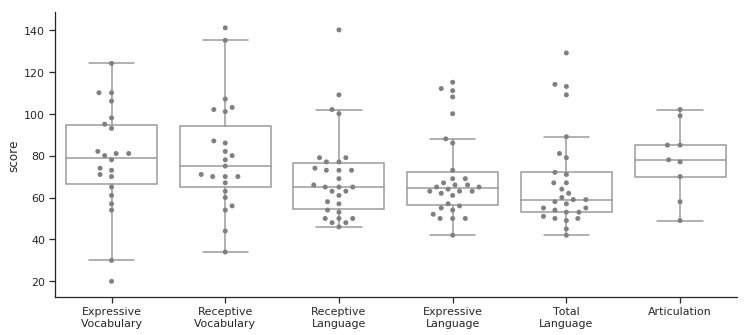

In [56]:
sns.catplot("domain_labels", y="score", data=test_scores, kind="box", color='white', fliersize=0)
sns.swarmplot("domain_labels", y="score", data=test_scores, color='grey')
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [45]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_amp_greater_6                                      
Articulation          False                3.0  72.666667  25.106440  49.0   
                      True                 6.0  80.833333  14.330620  58.0   
Expressive Language   False               14.0  76.357143  23.404822  42.0   
                      True                16.0  64.562500  15.953970  50.0   
Expressive Vocabulary False                9.0  77.777778  27.585221  30.0   
                      True                13.0  77.923077  24.339479  20.0   
Language              False               14.0  73.071429  27.215562  42.0   
                      True                15.0  62.933333  16.718111  45.0   
Receptive Language    False               14.0  73.214286  26.902040  48.0   
                      True                16.0  66.375000  13.559130  46.0   
Receptive Vocabulary  False                9.0  84.777778  33.822248  44.0   
                      True                14.0  76.642857  20.447333  34.0   

                                           25%   50%     75%    max  
domain                age_amp_greater_6                              
Articulation          False              59.50  70.0   84.50   99.0  
                      True               77.25  81.5   85.00  102.0  
Expressive Language   False              62.25  66.5   96.50  115.0  
                      True               54.25  63.0   66.75  112.0  
Expressive Vocabulary False              65.00  78.0   81.00  124.0  
                      True               70.00  80.0   95.00  110.0  
Language              False              54.25  61.5   86.50  129.0  
                      True               52.00  59.0   67.00  113.0  
Receptive Language    False              52.00  65.5   77.75  140.0  
                      True               56.25  65.0   74.00  100.0  
Receptive Vocabulary  False              63.00  71.0  101.00  141.0  
                      True               67.75  77.5   86.75  107.0

Age of enrollment greater than 6mo.

In [47]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_enroll_greater_6                                      
Articulation          False                   3.0  82.333333  14.977761  70.0   
                      True                    6.0  76.000000  19.452506  49.0   
Expressive Language   False                  14.0  72.214286  23.603059  42.0   
                      True                   16.0  68.187500  17.539360  50.0   
Expressive Vocabulary False                  12.0  77.166667  26.135428  30.0   
                      True                   10.0  78.700000  25.100022  20.0   
Language              False                  14.0  70.357143  27.399066  42.0   
                      True                   15.0  65.466667  17.634652  45.0   
Receptive Language    False                  14.0  72.071429  27.260747  48.0   
                      True                   16.0  67.375000  13.390917  46.0   
Receptive Vocabulary  False                  12.0  83.916667  30.407709  44.0   
                      True                   11.0  75.363636  20.877130  34.0   

                                              25%   50%     75%    max  
domain                age_enroll_greater_6                              
Articulation          False                 74.00  78.0   88.50   99.0  
                      True                  62.75  81.0   85.00  102.0  
Expressive Language   False                 55.50  64.5   82.75  115.0  
                      True                  59.75  64.5   69.00  112.0  
Expressive Vocabulary False                 63.00  73.5   87.25  124.0  
                      True                  72.00  81.0   94.50  110.0  
Language              False                 53.25  57.0   77.25  129.0  
                      True                  55.00  60.0   69.00  113.0  
Receptive Language    False                 50.75  65.5   73.75  140.0  
                      True                  60.00  65.0   77.00  100.0  
Receptive Vocabulary  False                 66.00  70.5  102.50  141.0  
                      True                  63.00  80.0   86.50  103.0

(Non-)Profound hearing loss

In [49]:
(test_scores.assign(profound_hl=test_scores.degree_hl==6)
         .groupby(['domain', 'profound_hl'])
         .score.describe())

count       mean        std   min    25%  \
domain                profound_hl                                             
Articulation          False          6.0  80.666667  16.966634  58.0  71.75   
                      True           3.0  73.000000  20.784610  49.0  67.00   
Expressive Language   False         13.0  65.153846  17.116494  50.0  55.00   
                      True          17.0  73.823529  22.232396  42.0  63.00   
Expressive Vocabulary False         11.0  75.636364  23.423376  30.0  63.50   
                      True          11.0  80.090909  27.569746  20.0  68.00   
Language              False         13.0  63.076923  17.255248  49.0  54.00   
                      True          16.0  71.687500  26.053071  42.0  53.00   
Receptive Language    False         13.0  66.384615  12.984211  48.0  58.00   
                      True          17.0  72.000000  25.322915  46.0  50.00   
Receptive Vocabulary  False         11.0  75.272727  20.703096  44.0  61.50   
                      True          12.0  84.000000  30.489939  34.0  69.25   

                                    50%    75%    max  
domain                profound_hl                      
Articulation          False        77.5  93.75  102.0  
                      True         85.0  85.00   85.0  
Expressive Language   False        62.0  66.00  112.0  
                      True         66.0  86.00  115.0  
Expressive Vocabulary False        74.0  88.50  110.0  
                      True         80.0  95.50  124.0  
Language              False        58.0  64.00  113.0  
                      True         63.5  81.50  129.0  
Receptive Language    False        65.0  73.00  100.0  
                      True         69.0  79.00  140.0  
Receptive Vocabulary  False        70.0  90.00  107.0  
                      True         81.0  90.50  141.0

Parent with(out) hearing loss

In [51]:
test_scores.loc[test_scores.parent_hearing_loss=='Unknown', 'parent_hearing_loss'] = np.nan
(test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss']))
         .groupby(['domain', 'parent_with_hl'])
         .score.describe())

count       mean        std   min  \
domain                parent_with_hl                                      
Articulation          False             7.0  74.142857  17.449246  49.0   
                      True              2.0  92.000000   9.899495  85.0   
Expressive Language   False            28.0  70.571429  20.966337  42.0   
                      True              2.0  63.000000   1.414214  62.0   
Expressive Vocabulary False            20.0  78.550000  26.049497  20.0   
                      True              2.0  71.000000  14.142136  61.0   
Language              False            27.0  68.592593  23.241639  42.0   
                      True              2.0  57.500000   3.535534  55.0   
Receptive Language    False            28.0  70.000000  21.451064  46.0   
                      True              2.0  63.500000   3.535534  61.0   
Receptive Vocabulary  False            21.0  81.142857  26.685737  34.0   
                      True              2.0  66.000000  16.970563  54.0   

                                        25%   50%     75%    max  
domain                parent_with_hl                              
Articulation          False           64.00  77.0   81.50  102.0  
                      True            88.50  92.0   95.50   99.0  
Expressive Language   False           55.75  65.0   76.25  115.0  
                      True            62.50  63.0   63.50   64.0  
Expressive Vocabulary False           68.75  79.0   95.75  124.0  
                      True            66.00  71.0   76.00   81.0  
Language              False           53.00  59.0   75.50  129.0  
                      True            56.25  57.5   58.75   60.0  
Receptive Language    False           53.75  65.0   77.00  140.0  
                      True            62.25  63.5   64.75   66.0  
Receptive Vocabulary  False           67.00  75.0  101.00  141.0  
                      True            60.00  66.0   72.00   78.0

Mother with(out) college education

In [53]:
test_scores.groupby(['domain', 'mother_college']).score.describe()

count       mean        std   min  \
domain                mother_college                                      
Articulation          0                 2.0  63.500000  20.506097  49.0   
                      1                 7.0  82.285714  15.553288  58.0   
Expressive Language   0                13.0  65.076923  19.830370  50.0   
                      1                17.0  73.882353  20.444689  42.0   
Expressive Vocabulary 0                 8.0  74.000000  29.717720  30.0   
                      1                14.0  80.071429  22.916116  20.0   
Language              0                13.0  63.076923  22.332568  49.0   
                      1                16.0  71.687500  22.758790  42.0   
Receptive Language    0                13.0  66.769231  23.707080  48.0   
                      1                17.0  71.705882  18.694132  46.0   
Receptive Vocabulary  0                 6.0  80.166667  36.635593  44.0   
                      1                17.0  79.705882  22.690209  34.0   

                                        25%   50%    75%    max  
domain                mother_college                             
Articulation          0               56.25  63.5  70.75   78.0  
                      1               73.50  85.0  92.00  102.0  
Expressive Language   0               54.00  57.0  65.00  115.0  
                      1               63.00  67.0  86.00  112.0  
Expressive Vocabulary 0               56.25  71.5  85.00  124.0  
                      1               71.75  81.0  94.50  110.0  
Language              0               51.00  57.0  59.00  129.0  
                      1               55.00  67.0  79.50  114.0  
Receptive Language    0               54.00  63.0  65.00  140.0  
                      1               61.00  73.0  77.00  109.0  
Receptive Vocabulary  0               57.75  66.5  97.75  141.0  
                      1               70.00  78.0  87.00  135.0